#Linear Algebra

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler



## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

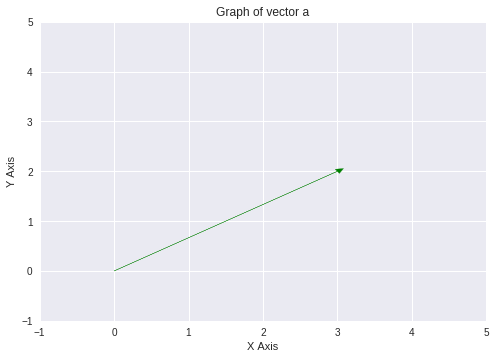

In [2]:
vector_a = [3,2]
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.arrow(0, 0, vector_a[0], vector_a[1], head_width=.1, head_length=0.1, color ='g')
plt.title('Graph of vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = np.matrix('17 -4 -2 1')

np.linalg.norm(b)

17.60681686165901

In [0]:
#Based on the Pythagoran theorem, this number tells us how long the vector is on the euclidean plane.

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [5]:
c= np.array([3, 7, -2, 12])
d= np.array([9, -7, 4, 6])

np.matmul(c,d)


42

In [6]:
np.dot(c,d)
#We can also use dot in this example.

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
e =np.matrix('7 4 2 ; 1 3 -1 ; 2 6 -4') #Define Matrix

In [8]:
np.linalg.inv(e)#Inverse

matrix([[ 0.17647059, -0.82352941,  0.29411765],
        [-0.05882353,  0.94117647, -0.26470588],
        [ 0.        ,  1.        , -0.5       ]])

In [9]:
e.transpose()#Transpose

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

In [10]:
e.T #Transpose the short way

matrix([[ 7,  1,  2],
        [ 4,  3,  6],
        [ 2, -1, -4]])

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



# Customers:

##Mean = 1135.714286	

##Variance = 98761.904762

##Standard Deviation = 314.264069	

# Inches of Snow:

##Mean = 2.714286	

##Variance = 8.571429	

##Standard Deviation = 2.927700	

In [0]:
#Work to get answers

In [12]:

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [13]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


In [14]:
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
#No, completely different units of measurement. We would have to do some kind of standardization to compare directly.(Perhaps divide by std?)

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [16]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [17]:
# Let me get you some data to start you off.
data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)


In [19]:
X.head()#Drop the country

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
scaler = preprocessing.StandardScaler()#Need standard scaler because we want mean of 0 and std of 1

In [21]:
standardized = scaler.fit_transform(X)#Scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
standardized#Yuck, numpy, but it works

array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535,  0.73740709, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112,  0.13055067],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047,  0.9292974 ,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624,  1.54795798],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912, -0.0575671 , -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664, -0.54085279],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 , -1.60913739,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072

In [23]:
#Let's do this in a better way. Standard scale again, but this time we'll do PCA

scaler = StandardScaler()

scaled_food = pd.DataFrame(scaler.fit_transform(X),
                               columns=X.columns);

pca = PCA(2) #We want 2 Principal components


pca.fit(scaled_food)

B = pd.DataFrame(pca.transform(scaled_food))

print (len(B))

B.head()

4


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [24]:
scaled_food#Nice, our values are scaled, but is the mean 0 and standard deviation 1?

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


In [0]:
sf = scaled_food#Just in case....

In [26]:
sf.columns

Index(['Alcoholic Drinks', 'Beverages', 'Carcass_Meat', 'Cereals', 'Cheese',
       'Confectionery', 'Fats_and_Oils', 'Fish', 'Fresh_Fruit',
       'Fresh_Potatoes', 'Fresh_Veg', 'Other_Meat', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Soft_Drinks', 'Sugars'],
      dtype='object')

In [27]:
Xcols=['Alcoholic Drinks', 'Beverages', 'Carcass_Meat', 'Cereals', 'Cheese',
       'Confectionery', 'Fats_and_Oils', 'Fish', 'Fresh_Fruit',
       'Fresh_Potatoes', 'Fresh_Veg', 'Other_Meat', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Soft_Drinks', 'Sugars']
y = df['Country']
X = sf[Xcols]
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,0.104998,-0.051917,-0.017495,-0.644322,0.658275,-0.138303,-0.632429,0.644585,0.737407,-0.450076,0.863312,-0.259546,0.377736,-0.336265,0.805477,-0.435231,0.130551
1,0.841823,1.609440,-1.277169,1.679463,0.535805,0.968122,1.535899,1.152440,0.929297,0.435696,1.093528,1.198856,1.401682,0.084066,1.171603,-1.404236,1.547958
2,0.716563,-0.467257,-0.227441,-0.855575,0.535805,0.746837,-1.097071,-0.332059,-0.057567,-1.335847,-0.709834,0.543811,-0.496364,1.513193,-0.878702,1.190727,-0.540853
3,-1.663384,-1.090266,1.522105,-0.179565,-1.729885,-1.576656,0.193601,-1.464967,-1.609137,1.350227,-1.247006,-1.483121,-1.283054,-1.260994,-1.098378,0.648741,-1.137656


In [0]:
means = np.mean(X.T, axis=1)
stds = np.std(X.T, axis=1)


In [29]:
print("\n Means: \n", means)#Should be 0, and it is, or very close
print("\n Standard Deviation: \n", stds)#Should be 1



 Means: 
 Alcoholic Drinks      0.000000e+00
Beverages            -5.551115e-17
Carcass_Meat          0.000000e+00
Cereals               6.938894e-18
Cheese                0.000000e+00
Confectionery         5.551115e-17
Fats_and_Oils         6.938894e-18
Fish                  0.000000e+00
Fresh_Fruit           0.000000e+00
Fresh_Potatoes        0.000000e+00
Fresh_Veg             5.551115e-17
Other_Meat            0.000000e+00
Other_Veg             0.000000e+00
Processed_Potatoes    0.000000e+00
Processed_Veg        -5.551115e-17
Soft_Drinks          -2.775558e-17
Sugars               -5.551115e-17
dtype: float64

 Standard Deviation: 
 Alcoholic Drinks      1.0
Beverages             1.0
Carcass_Meat          1.0
Cereals               1.0
Cheese                1.0
Confectionery         1.0
Fats_and_Oils         1.0
Fish                  1.0
Fresh_Fruit           1.0
Fresh_Potatoes        1.0
Fresh_Veg             1.0
Other_Meat            1.0
Other_Veg             1.0
Processed_Potatoe

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

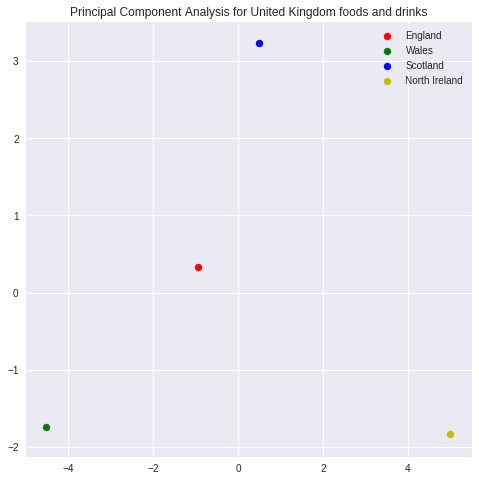

In [30]:
pca = PCA(2)
pca.fit(X)
targets = ["England","Wales","Scotland","North Ireland"]
colors = ['r','g','b', 'y']


    

B = pca.transform(X)
dfB= pd.DataFrame(B)
df_plot = pd.concat([dfB,df[['Country']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.title('Principal Component Analysis for United Kingdom foods and drinks')


for target, color in zip(targets, colors):
    indicesToKeep = df_plot['Country'] == target
    ax.scatter(df_plot.loc[indicesToKeep, 0]
              , df_plot.loc[indicesToKeep, 1]
              , c = color
              , s = 50)
ax.legend(['England', 'Wales', 'Scotland', 'North Ireland'])    
plt.show();

In [0]:
#There is our PCA!

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [32]:
ryandata = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
ryandata.head()
#Fun data...

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [33]:
X_cols = ryandata.columns
print(X_cols)

Index(['x', 'y'], dtype='object')


In [34]:
#We'll use robust scaler this time, just to mix it up. Robust scaler is very sensitive to outliers, so I think it could work well with clustering, lets see!
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

scaler = RobustScaler()

scaled_ryandata = pd.DataFrame(scaler.fit_transform(ryandata),
                               columns=ryandata.columns);

pca = PCA(2) #Let's do a lil PCA as well, since we already have the code

pca.fit(scaled_ryandata)

B = pd.DataFrame(pca.transform(scaled_ryandata))

print (len(B))

B.head()


200


,0,1
0,-1.293353,0.251201
1,-0.345092,-0.236839
2,0.396289,-0.625290
3,-0.984508,0.033037
4,0.252621,-0.600336


In [35]:
#import Kmeans cluster and let the library do the work
from sklearn.cluster import KMeans
cluster = KMeans() #default 8 clusters
cluster.fit_predict(ryandata)

array([7, 4, 5, 3, 5, 4, 7, 7, 2, 4, 0, 4, 5, 0, 3, 5, 3, 4, 6, 1, 7, 1,
       1, 1, 6, 0, 5, 2, 0, 4, 6, 6, 5, 1, 0, 4, 6, 4, 2, 5, 5, 1, 2, 2,
       2, 4, 6, 6, 7, 5, 1, 7, 7, 2, 1, 5, 4, 2, 2, 7, 1, 5, 7, 2, 1, 2,
       1, 2, 3, 2, 6, 4, 0, 0, 1, 1, 0, 0, 2, 1, 2, 4, 0, 4, 2, 6, 2, 6,
       0, 1, 2, 6, 1, 6, 5, 0, 6, 0, 6, 5, 6, 6, 3, 0, 4, 1, 7, 3, 7, 1,
       5, 1, 0, 7, 6, 4, 2, 2, 1, 2, 1, 5, 0, 3, 0, 7, 6, 1, 2, 7, 5, 7,
       0, 7, 2, 2, 5, 1, 7, 4, 2, 6, 0, 1, 5, 2, 6, 2, 7, 6, 0, 5, 3, 1,
       0, 2, 5, 1, 4, 7, 5, 6, 2, 7, 1, 1, 6, 2, 5, 5, 3, 5, 2, 1, 5, 6,
       4, 0, 4, 3, 4, 5, 4, 6, 5, 6, 3, 1, 2, 5, 6, 3, 1, 7, 0, 2, 1, 1,
       6, 5], dtype=int32)

In [0]:
k_range = range(4,7) #Let's just looks at 4 graphs here, from K=4 to K=7
k_means_var = [KMeans(n_clusters=k).fit(ryandata) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

In [0]:
#Let's Just plot our clusters!

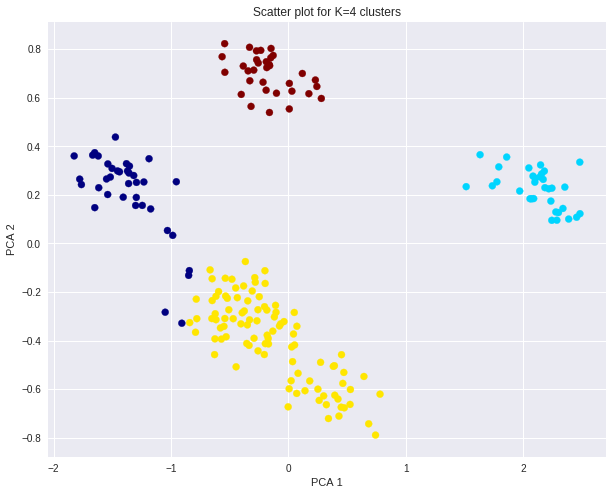

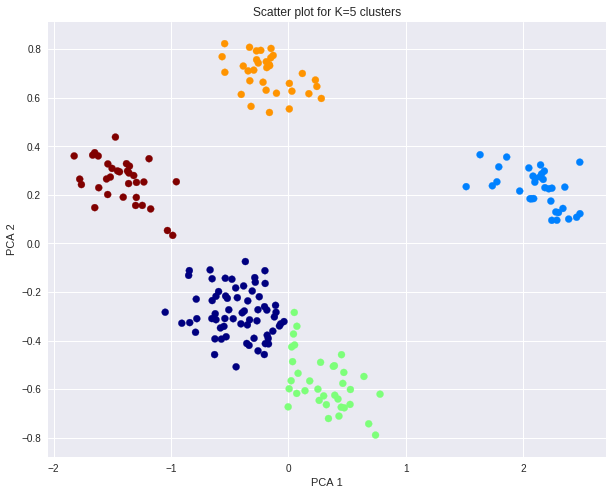

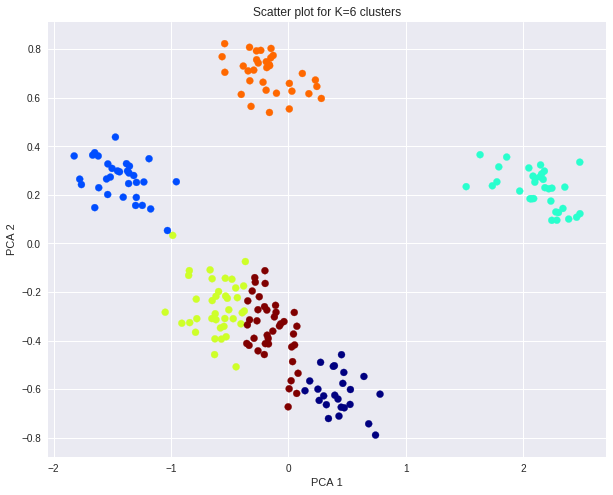

In [38]:
#mmmmm, matplotlib

for n_clusters in k_range:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    fig.set_size_inches(10, 8)
    kmeanscluster = KMeans(n_clusters=n_clusters, random_state=10)
    B['cluster'] = kmeanscluster.fit_predict(B)
 
    ax1.scatter(B[0],B[1], c=B['cluster'], cmap='jet')
    ax1.set_xlabel("PCA 1")
    ax1.set_ylabel("PCA 2")
    ax1.set_title("Scatter plot for K={} clusters".format(n_clusters))
    plt.show()
    
    del B['cluster']

In [0]:
# 5 looks good on eyeball test, let's do elbow stuff to confirm.